# Scikit learn for cross-validating OLS
## Dream Team - ORIE 4741 Project

In [1]:
using CSV, Plots, DataFrames, Statistics, LinearAlgebra, PyCall, Random

In [4]:
include("../plot_pred.jl")

plot_pred_true (generic function with 2 methods)

In [5]:
train_df = CSV.read("train.csv", DataFrame);
train = Matrix(train_df);
Xtrain = train[:, 1:(end-3)];

train_std = train[:, 190];
train_ppr = train[:, 191];
train_half = train[:, 192];

test_df = CSV.read("test.csv", DataFrame);
test = Matrix(test_df);
Xtest = test[:, 1:(end-3)];

test_std = test[:, 190];
test_ppr = test[:, 191];
test_half = test[:, 192];

In [6]:
lm = pyimport("sklearn.linear_model")
ms = pyimport("sklearn.model_selection")
metrics = pyimport("sklearn.metrics")
lr = lm.LinearRegression()

PyObject LinearRegression()

In [7]:
Random.seed!(0)
lm_cv = ms.cross_validate(lr, Xtrain, train_std, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)

Dict{Any,Any} with 4 entries:
  "fit_time"   => [1.26129, 1.26332, 1.17861, 1.15995, 1.18377, 1.18257, 1.2298…
  "score_time" => [0.00506878, 0.00199509, 0.00299358, 0.00299168, 0.00319004, …
  "estimator"  => (PyObject LinearRegression(), PyObject LinearRegression(), Py…
  "test_score" => [-19.4019, -20.3972, -20.3694, -19.26, -19.5687, -18.6355, -2…

In [8]:
lm_cv["test_score"]

10-element Array{Float64,1}:
 -19.40186817895818
 -20.397181819484718
 -20.369369785145558
 -19.26000643968881
 -19.568684395388058
 -18.63549692253282
 -20.28925951099432
 -20.386428289477415
 -20.08919402632861
 -19.685583415680206

In [9]:
lm_6_coef = lm_cv["estimator"][6].coef_

189-element Array{Float64,1}:
  0.04339017348232608
  4.810698640099426
 -2.3657577653065394
 -0.04084052483211989
 -0.0018732410804482014
 -0.17719466382665763
  0.1367918612002914
  7.436589864329502
  0.025503737582328184
 -0.149930960581512
  0.12540062033436472
  7.083969954644814
 -2.608853522263473
  ⋮
  8.881784197001252e-16
 -0.8369196447996181
 -4.440892098500626e-16
 -3.469400547081872
 -0.7989706825161744
  3.9049242570453324
 -1.882929698823729
  0.0
  0.0
  0.0
  0.0
  0.0

In [10]:
Xtest

10550×189 Array{Float64,2}:
 224.375  1.125  0.5   35.75       …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0        …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
 267.5    2.0    0.5   37.5           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0        …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 220.75   1.75   0.75  32.5           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   0.0    0.0    0.0    0.0           0.0  0.0  0.0  0.0  0.0  0.0  1.0
   ⋮                               ⋱

In [11]:
"""This function computes the mean squared error."""
function MSE(y, pred)
    error = (y.-pred).^2
    mse = sum(error[:, 1])/size(error, 1)
    return mse
end

MSE

In [12]:
test_pred = sum(lm_6_coef'.*Xtest, dims = 2)
MSE(test_std, test_pred)

20.241934563905307

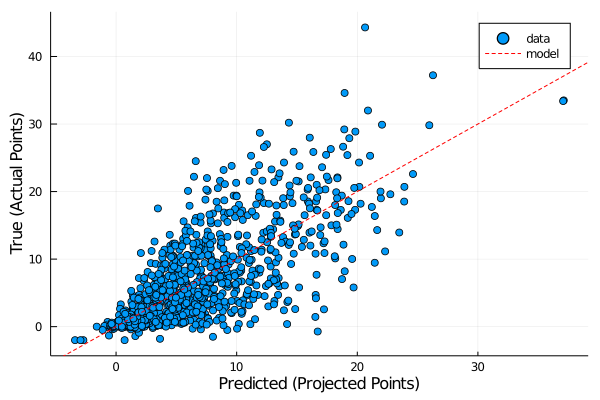

In [13]:
plot_pred_true(test_pred, test_std)